In [16]:
import cv2

In [17]:
img = cv2.imread('qasim.jpg',1)
img.shape

(1440, 1440, 3)

<IPython.core.display.Javascript object>


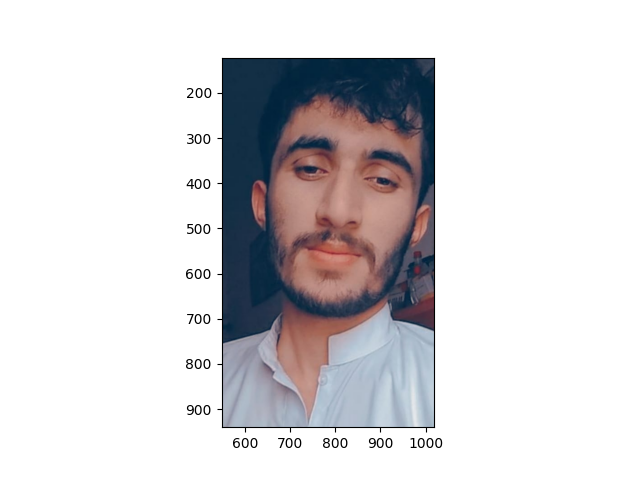

In [20]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.imshow(img[:,:,::-1])

In [2]:
import numpy as np
import cv2

In [3]:
img = cv2.imread('qasim.jpg',0)
img.shape

(1440, 1440)

In [4]:
arr = np.array(img)

In [5]:
arr

array([[248, 248, 248, ..., 248, 248, 248],
       [248, 248, 248, ..., 248, 248, 248],
       [248, 248, 248, ..., 248, 248, 248],
       ...,
       [248, 248, 248, ..., 248, 248, 248],
       [248, 248, 248, ..., 248, 248, 248],
       [248, 248, 248, ..., 248, 248, 248]], dtype=uint8)

In [7]:
( (1440 )/2 ,(1440 )/2 )

(720.0, 720.0)

In [22]:
crop = arr[220:720 , 720:1220]

<IPython.core.display.Javascript object>


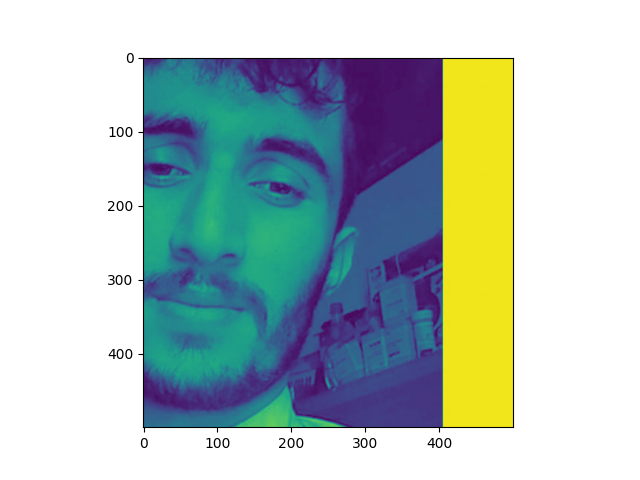

In [23]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.imshow(crop)

Task2

In [26]:
car1 = cv2.imread('car1.jpg',0)
car1.shape

(548, 1000)

In [29]:
car1

array([[17, 17, 17, ..., 60, 61, 62],
       [17, 17, 17, ..., 61, 61, 60],
       [17, 17, 17, ..., 62, 60, 59],
       ...,
       [36, 35, 36, ..., 82, 81, 81],
       [35, 33, 34, ..., 80, 79, 79],
       [35, 32, 33, ..., 76, 76, 75]], dtype=uint8)

In [34]:
car1_crop = car1[0:500,0:500]

<IPython.core.display.Javascript object>


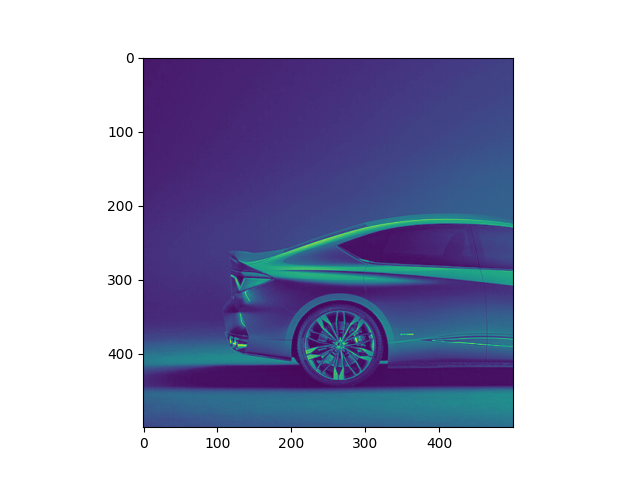

In [35]:
plt.imshow(car1_crop)

In [48]:
car2 = cv2.imread('car2.jpg',0)
car2.shape

(548, 1000)

In [49]:
car2

array([[17, 17, 17, ..., 60, 61, 62],
       [17, 17, 17, ..., 61, 61, 60],
       [17, 17, 17, ..., 62, 60, 59],
       ...,
       [36, 35, 36, ..., 82, 81, 81],
       [35, 33, 34, ..., 80, 79, 79],
       [35, 32, 33, ..., 76, 76, 75]], dtype=uint8)

In [50]:
car2_crop = car2[0:500,0:500]

<IPython.core.display.Javascript object>


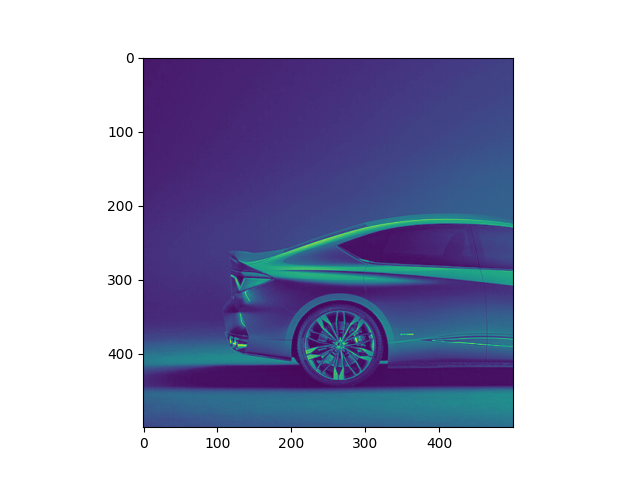

In [51]:
plt.imshow(car2_crop)

In [59]:
combine = np.hstack((car1_crop, car2_crop))

<IPython.core.display.Javascript object>


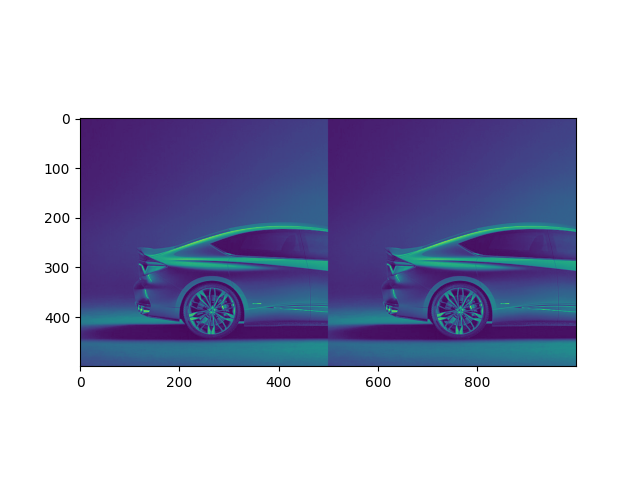

In [60]:
plt.imshow(combine)

Task3

In [77]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [78]:
img = Image.open('qasim.jpg')

In [79]:
arr = np.array(img)

In [80]:
img_gray = (arr[:,:,0]+arr[:,:,1]+arr[:,:,2])/3

In [81]:
image = Image.fromarray(img_gray)

In [82]:
image.show()

### Task4

In [61]:
filter = [[-1,0,1],
          [-1,0,1],
          [-1,0,1]]

In [62]:
img = Image.open('qasim.jpg')

In [64]:
arr = np.array(img)
arr

array([[[255, 246, 237],
        [255, 246, 237],
        [255, 246, 237],
        ...,
        [255, 246, 237],
        [255, 246, 237],
        [255, 246, 237]],

       [[255, 246, 237],
        [255, 246, 237],
        [255, 246, 237],
        ...,
        [255, 246, 237],
        [255, 246, 237],
        [255, 246, 237]],

       [[255, 246, 237],
        [255, 246, 237],
        [255, 246, 237],
        ...,
        [255, 246, 237],
        [255, 246, 237],
        [255, 246, 237]],

       ...,

       [[255, 246, 237],
        [255, 246, 237],
        [255, 246, 237],
        ...,
        [255, 246, 237],
        [255, 246, 237],
        [255, 246, 237]],

       [[255, 246, 237],
        [255, 246, 237],
        [255, 246, 237],
        ...,
        [255, 246, 237],
        [255, 246, 237],
        [255, 246, 237]],

       [[255, 246, 237],
        [255, 246, 237],
        [255, 246, 237],
        ...,
        [255, 246, 237],
        [255, 246, 237],
        [255, 246, 237]]

In [71]:
# Assuming the image has channels as the last dimension.
# filter.shape -> (kernel_size, kernel_size, channels)
# image.shape -> (width, height, channels)
def convolve(image, filter, padding = (1, 1)):
    # For this to work neatly, filter and image should have the same number of channels
    # Alternatively, filter could have just 1 channel or 2 dimensions
    
    if(image.ndim == 2):
        image = np.expand_dims(image, axis=-1) # Convert 2D grayscale images to 3D
    if(filter.ndim == 2):
        filter = np.repeat(np.expand_dims(filter, axis=-1), image.shape[-1], axis=-1) # Same with filters
    if(filter.shape[-1] == 1):
        filter = np.repeat(filter, image.shape[-1], axis=-1) # Give filter the same channel count as the image
    
    #print(filter.shape, image.shape)
    assert image.shape[-1] == filter.shape[-1]
    size_x, size_y = filter.shape[:2]
    width, height = image.shape[:2]
    
    output_array = np.zeros(((width - size_x + 2*padding[0]) + 1, 
                             (height - size_y + 2*padding[1]) + 1,
                             image.shape[-1])) # Convolution Output: [(W−K+2P)/S]+1
    
    padded_image = np.pad(image, [
        (padding[0], padding[0]),
        (padding[1], padding[1]),
        (0, 0)
    ])
    
    for x in range(padded_image.shape[0] - size_x + 1): # -size_x + 1 is to keep the window within the bounds of the image
        for y in range(padded_image.shape[1] - size_y + 1):

            # Creates the window with the same size as the filter
            window = padded_image[x:x + size_x, y:y + size_y]

            # Sums over the product of the filter and the window
            output_values = np.sum(filter * window, axis=(0, 1)) 

            # Places the calculated value into the output_array
            output_array[x, y] = output_values
            
    return output_array

In [76]:
filter = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
], dtype=np.float32)/9.0 # Box Filter

image = Image.open('qasim.jpg')
image_arr = np.array(image)/255.0

convolved_arr = convolve(image_arr, filter, padding=(1, 1))
convolved = Image.fromarray(np.uint8(255 * convolved_arr), 'RGB') # Convolved Image
convolved.show()

In [84]:
filter = np.array([
    [1.0, 2.0, 1.0],
    [2.0, 4.0, 2.0],
    [1.0, 2.0, 1.1]
], dtype=np.float32)/9.0 # Box Filter

image = Image.open('qasim.jpg')
image_arr = np.array(image)/255.0

convolved_arr = convolve(image_arr, filter, padding=(1, 1))
convolved = Image.fromarray(np.uint8(255 * convolved_arr), 'RGB') # Convolved Image
convolved.show()

In [85]:
filter = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
], dtype=np.float32)/9.0 # Box Filter

image = Image.open('qasim.jpg')
image_arr = np.array(image)/255.0

convolved_arr = convolve(image_arr, filter, padding=(1, 1))
convolved = Image.fromarray(np.uint8(255 * convolved_arr), 'RGB') # Convolved Image
convolved.show()

### Task5

In [88]:
import math
import numpy as np


def rotate_via_numpy(xy, radians):
    """Use numpy to build a rotation matrix and take the dot product."""
    x, y = xy
    c, s = np.cos(radians), np.sin(radians)
    j = np.matrix([[c, s], [-s, c]])
    m = np.dot(j, [x, y])

    return float(m.T[0]), float(m.T[1])

In [90]:
theta = math.radians(90)
point = (5, -11)
print(rotate_via_numpy(point, theta))

(-11.0, -5.000000000000001)


In [89]:
rotated_image = rotate_via_numpy(image, 45)

TypeError: cannot unpack non-iterable JpegImageFile object

In [91]:
import numpy as np
from PIL import Image
import math


image = np.array(Image.open("qasim.jpg"))             # Load the image
angle=int(input("Enter the angle :- "))                # Ask the user to enter the angle of rotation

# Define the most occuring variables
angle=math.radians(angle)                               #converting degrees to radians
cosine=math.cos(angle)
sine=math.sin(angle)
height=image.shape[0]                                   #define the height of the image
width=image.shape[1]                                    #define the width of the image

# Define the height and width of the new image that is to be formed
new_height  = round(abs(image.shape[0]*cosine)+abs(image.shape[1]*sine))+1
new_width  = round(abs(image.shape[1]*cosine)+abs(image.shape[0]*sine))+1

# define another image variable of dimensions of new_height and new _column filled with zeros
output=np.zeros((new_height,new_width,image.shape[2]))

# Find the centre of the image about which we have to rotate the image
original_centre_height   = round(((image.shape[0]+1)/2)-1)    #with respect to the original image
original_centre_width    = round(((image.shape[1]+1)/2)-1)    #with respect to the original image

# Find the centre of the new image that will be obtained
new_centre_height= round(((new_height+1)/2)-1)        #with respect to the new image
new_centre_width= round(((new_width+1)/2)-1)          #with respect to the new image

for i in range(height):
    for j in range(width):
        #co-ordinates of pixel with respect to the centre of original image
        y=image.shape[0]-1-i-original_centre_height                   
        x=image.shape[1]-1-j-original_centre_width                      

        #co-ordinate of pixel with respect to the rotated image
        new_y=round(-x*sine+y*cosine)
        new_x=round(x*cosine+y*sine)

        '''since image will be rotated the centre will change too, 
           so to adust to that we will need to change new_x and new_y with respect to the new centre'''
        new_y=new_centre_height-new_y
        new_x=new_centre_width-new_x

        # adding if check to prevent any errors in the processing
        if 0 <= new_x < new_width and 0 <= new_y < new_height and new_x>=0 and new_y>=0:
            output[new_y,new_x,:]=image[i,j,:]                          #writing the pixels to the new destination in the output image

pil_img=Image.fromarray((output).astype(np.uint8))                       # converting array to image
pil_img.save("rotated_image.png")

Enter the angle :- 45
